In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Characteristics of Extrasolar Planets

In this notebook, we are going to use the [open exoplanet catalogue](http://www.openexoplanetcatalogue.com/) to look at the exoplanet population. Do have a look at this website, because it has a lot of interesting stuff on it! Below, we are going to look at a few plots of our own, generated from their data. 

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, update_display, HTML
import ipywidgets as widgets

from planet import planet as pl

me = 5.972e24
re = 6.371e6
mjup = 312.0*me
rjup = 6.991e7

# python 3.x
import xml.etree.ElementTree as ET, urllib.request, gzip, io
url = "https://github.com/OpenExoplanetCatalogue/oec_gzip/raw/master/systems.xml.gz"
oec = ET.parse(gzip.GzipFile(fileobj=io.BytesIO(urllib.request.urlopen(url).read())))

## Mass versus Period

One of the most standard plots of the exoplanet population is mass versus period. Of course, the vertical axis has to be \(M \sin i\) to allow planets that were found with the radial velocity method. You can zoom in on various parts of the diagram, and hover over a symbol to get the name of the planet. Can you find Earth and Jupiter? What are their closest extrasolar analogs? Try and Google some of the more extreme planets. Many of them have Wikipedia pages! Note the total number of planets. Can you think of a reason why it may perhaps be lower than expected?

<IPython.core.display.Javascript object>


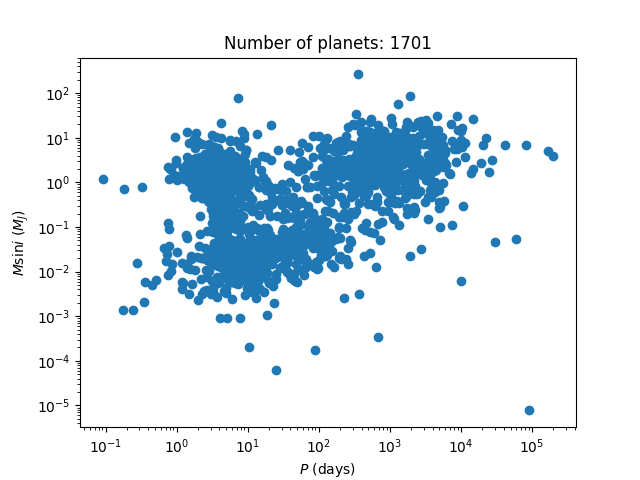

In [3]:
fig1, ax1 = plt.subplots(num='Mass versus Period')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$P$ (days)')
ax1.set_ylabel(r'$M \sin i$ ($M_J$)')

oec_masses, oec_period, oec_names = pl.read_oec(oec, "mass", "period")

ax1.set_title('Number of planets: {}'.format(len(oec_masses)))
sp1 = pl.ScatterPlot(fig1, ax1, oec_period, oec_masses, oec_names)

## Radius versus Period

As you might have guessed, many planets are missing from the mass-period diagram because no accurate mass has been determined (for example, many of the Kepler planets). Howver, in many cases, while we do not know the mass exactly, we know it is not a star, and we can plausibly exclude a false positive. If we look at a radius-period diagram, we get a lot more planets! Can you find the closest Earth analog? Google the identification and have a look at its Wikipedia page. 

<IPython.core.display.Javascript object>


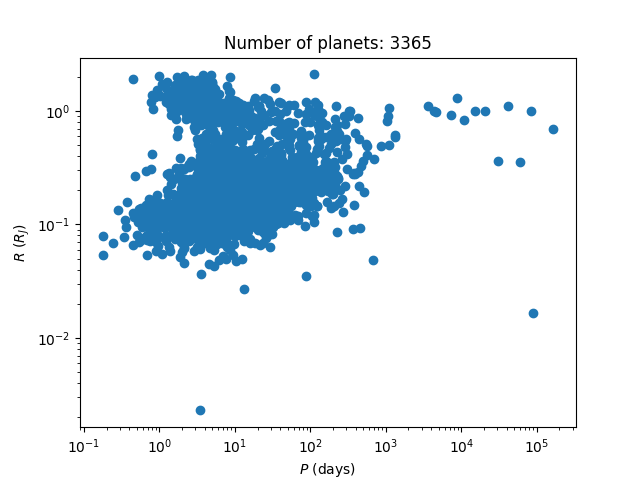

In [4]:
fig2, ax2 = plt.subplots(num='Radius versus Period')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$P$ (days)')
ax2.set_ylabel(r'$R$ ($R_J$)')

oec_radii, oec_period, oec_names = pl.read_oec(oec, "radius", "period")

ax2.set_title('Number of planets: {}'.format(len(oec_radii)))
sp2 = pl.ScatterPlot(fig2, ax2, oec_period, oec_radii, oec_names)

## Eccentricity versus mass

As mentioned in the lectures, many extrasolar planets are found on eccentric orbits. Below, we look at eccentricity versus planet mass. What is the most eccentric planet you can find? Can you spot a trend in the plot? This is not part of the module, but there are a few ideas about why this may be the case. One has to do with the very last subject we are going to tackle in lecture 11.

<IPython.core.display.Javascript object>


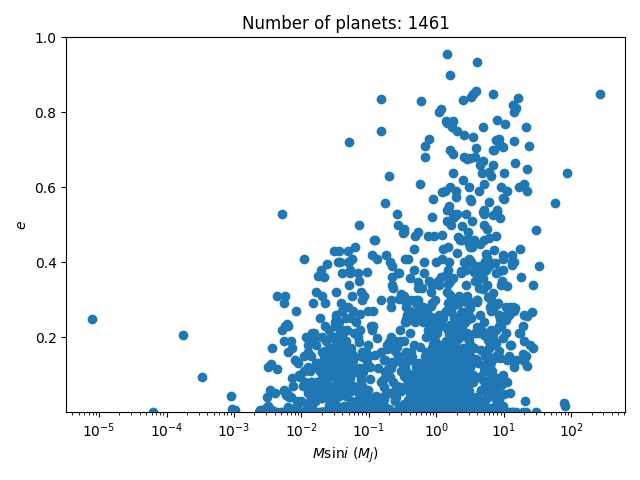

In [5]:
fig3, ax3 = plt.subplots(num='Eccentricity versus Mass')

ax3.set_xscale('log')
#ax3.set_yscale('log')
ax3.set_xlabel(r'$M\sin i$ ($M_J$)')
ax3.set_ylabel(r'$e$')

oec_mass, oec_ecc, oec_names = pl.read_oec(oec, "mass", "eccentricity")

ax3.set_title('Number of planets: {}'.format(len(oec_mass)))
sp3 = pl.ScatterPlot(fig3, ax3, oec_mass, oec_ecc, oec_names)

ax3.set_ylim([0.001,1])
plt.tight_layout()

## Radius versus Mass

In the lectures, we spent a lot of time discussing mass-radius relationships. In the plot below, you can see the same trends we saw earlier, with the transition from terrestrial to gas giant planets. Some simple constant-density models are shown for comparison. Can you think of a reason why a planet may have a higher density than iron? 

You can see that planets do not often get bigger than Jupiter. Google the three largest planets. What have they got in common? 

<IPython.core.display.Javascript object>


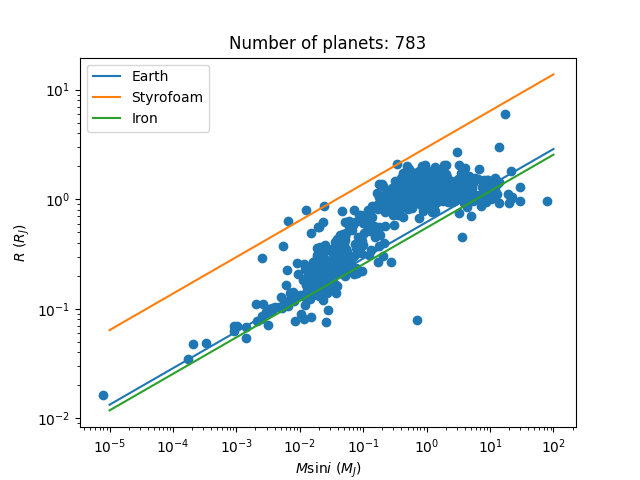

In [6]:
fig4, ax4 = plt.subplots(num='Radius versus Mass')

ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel(r'$M\sin i$ ($M_J$)')
ax4.set_ylabel(r'$R$ ($R_J$)')

oec_mass, oec_rad, oec_names = pl.read_oec(oec, "mass", "radius")

ax4.set_title('Number of planets: {}'.format(len(oec_mass)))
sp4 = pl.ScatterPlot(fig4, ax4, oec_mass, oec_rad, oec_names)

mass = np.logspace(-5, 2, 100)

def rad_dens(mass, dens):
    return np.power(3*mass/(4*np.pi*dens), 1/3)

ax4.plot(mass, rad_dens(mass*6e27*312, 5.51)/7000000000, label='Earth')
ax4.plot(mass, rad_dens(mass*6e27*312, 0.05)/7000000000, label='Styrofoam')
ax4.plot(mass, rad_dens(mass*6e27*312, 7.874)/7000000000, label='Iron')

ax4.legend();

## Period versus Semi-major Axis

Can you remember how to calculate the semi-major axis from the period? What causes the spread in the figure below? Should all points not be on a line? (Answer: no, but why?). 

<IPython.core.display.Javascript object>


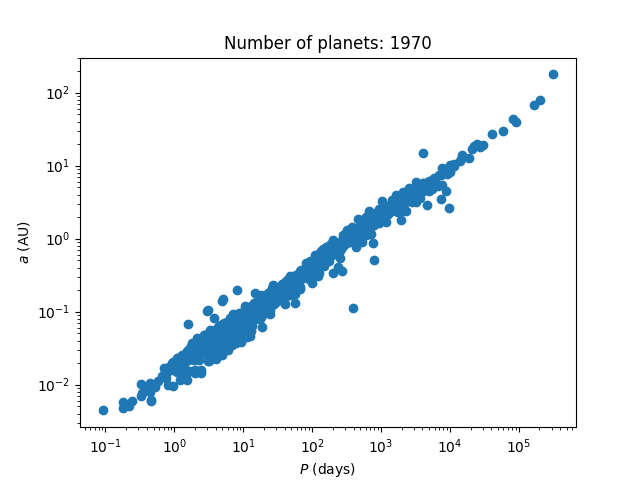

In [7]:
fig5, ax5 = plt.subplots(num='Period versus Semi-major axis')

ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.set_xlabel(r'$P$ (days)')
ax5.set_ylabel(r'$a$ (AU)')

oec_mass, oec_rad, oec_names = pl.read_oec(oec, "period", "semimajoraxis")

ax5.set_title('Number of planets: {}'.format(len(oec_mass)))
sp5 = pl.ScatterPlot(fig5, ax5, oec_mass, oec_rad, oec_names)

## Equilibrium Temperature versus Mass

Finally, we take a look at the equilibrium temperature, where available. The habitable zone is in between the red lines. Why do you think most planets are hot planets? What are the best candidates for the search for life that we know of?

<IPython.core.display.Javascript object>


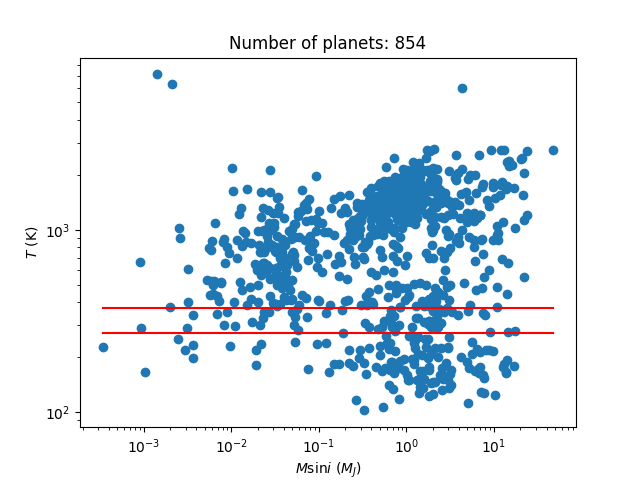

In [8]:
fig6, ax6 = plt.subplots(num='Equilibrium Temperature versus Mass')

ax6.set_xscale('log')
ax6.set_yscale('log')
ax6.set_xlabel(r'$M\sin i$ ($M_J$)')
ax6.set_ylabel(r'$T$ (K)')

oec_mass, oec_rad, oec_names = pl.read_oec(oec, "mass", "temperature")

ax6.set_title('Number of planets: {}'.format(len(oec_mass)))
sp6 = pl.ScatterPlot(fig6, ax6, oec_mass, oec_rad, oec_names)

ax6.plot([np.min(oec_mass), np.max(oec_mass)], [273, 273], color='red');
ax6.plot([np.min(oec_mass), np.max(oec_mass)], [373, 373], color='red');
